In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

N_COMPONENTS = 2

dataset = load_iris()
data = dataset.data
labels = dataset.target
n_categories = len(np.unique(labels))

In [2]:
def plot_data(transformed_iris, reverse_x=False, reverse_y=False):
    if N_COMPONENTS != 2:
        print(f'plot cannot be drawn for {N_COMPONENTS} components')
        return
    x1 = transformed_iris[:, 0]
    x2 = transformed_iris[:, 1]
    y = transformed_iris[:, 2]
    cmap = plt.cm.get_cmap('rainbow', n_categories)
    plt.scatter(x1, x2, c=y, cmap=cmap)
        
    if reverse_x:
        xmin, xmax = plt.xlim()
        plt.xlim(xmax, xmin)
    if reverse_y:
        ymin, ymax = plt.ylim()
        plt.ylim(ymax, ymin)

    plt.show()

In [3]:
def numpy_pca(data, n_components):
    mean_normalized = data - data.mean(axis=0)
    covariance_matrix = np.dot(mean_normalized.T, mean_normalized) / len(mean_normalized)
    u, s, vh = np.linalg.svd(covariance_matrix)
    transformed_data = np.matmul(u[:,:n_components].T, data.T).T
    explained_variance_ratio = s[:N_COMPONENTS] / sum(s)
    return transformed_data, explained_variance_ratio

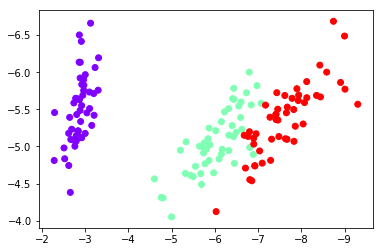

In [4]:
# appending labels column and plotting
transformed_data, np_explained_variance_ratio = numpy_pca(data, N_COMPONENTS)
transformed_data = np.c_[transformed_data, labels]
plot_data(transformed_data, reverse_x=True, reverse_y=True)

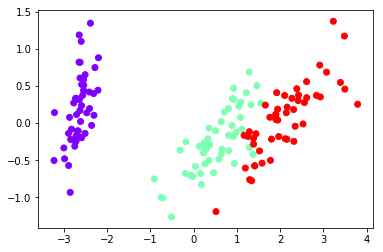

In [5]:
# plotting sklearn PCA for verification
from sklearn.decomposition import PCA
pca = PCA(n_components=N_COMPONENTS)
transformed_data = pca.fit_transform(data)
transformed_data = np.c_[transformed_data, labels]

plot_data(transformed_data)

In [6]:
# explained variance ratios verification
np.array_equal(pca.explained_variance_ratio_.round(8), np_explained_variance_ratio.round(8))

True

In [7]:
variance_retained = (sum(np_explained_variance_ratio) * 100).round(4)
print(f'{variance_retained} percent of variance retained')

97.7632 percent of variance retained
